# 붓꽃 데이터 군집화

## k-means 클러스터링

### 데이터 셋(Dataset) 및 전처리

In [1]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [10]:
# 데이터셋 준비
from sklearn.datasets import load_iris

iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
df_iris['target_names'] = df_iris.target.apply(lambda x: 'setosa' if x == 0 \
                                                    else ('versicolor' if x == 1
                                                        else 'virginica'))
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [7]:
iris.target, iris.target_names

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

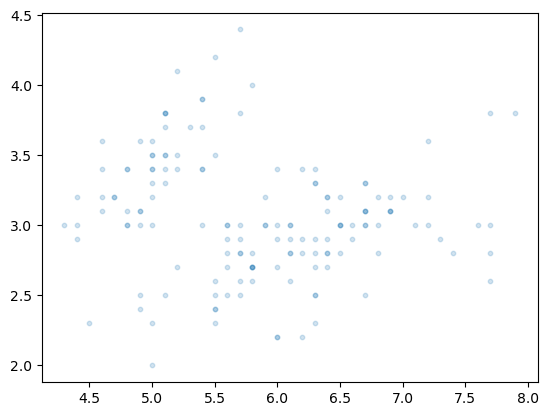

In [15]:
plt.scatter(x=df_iris['sepal length (cm)'], y=df_iris['sepal width (cm)'], 
            alpha=0.2, s=10);

## K = 2인 군집 만들기

In [18]:
X = df_iris[['sepal length (cm)', 'sepal width (cm)']]

model2 = KMeans(n_clusters=2, random_state=111)
model2.fit(X=X)

KMeans(n_clusters=2, random_state=111)

In [19]:
model2.cluster_centers_

array([[5.22409639, 3.1313253 ],
       [6.61044776, 2.96567164]])

In [24]:
model2.inertia_

58.20409278906672

In [22]:
# 모델 예측
pred2 = model2.predict(X)
df_iris['k=2'] = pred2
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names,k=2
0,5.1,3.5,1.4,0.2,0,setosa,0
1,4.9,3.0,1.4,0.2,0,setosa,0
2,4.7,3.2,1.3,0.2,0,setosa,0
3,4.6,3.1,1.5,0.2,0,setosa,0
4,5.0,3.6,1.4,0.2,0,setosa,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,1
146,6.3,2.5,5.0,1.9,2,virginica,1
147,6.5,3.0,5.2,2.0,2,virginica,1
148,6.2,3.4,5.4,2.3,2,virginica,1


In [23]:
df_iris['k=2'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

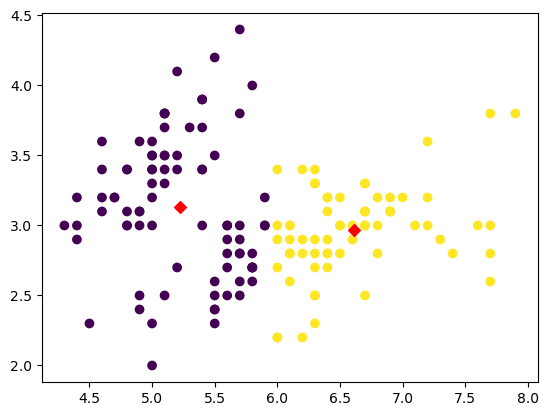

In [29]:
# model2 시각화
model2_df = pd.DataFrame(X, columns=iris.feature_names[:2])
model2_df['cluster'] = df_iris['k=2'].values

plt.scatter(model2_df.iloc[:, 0], model2_df.iloc[:, 1], c=model2_df.cluster)
plt.scatter(model2.cluster_centers_[:, 0], model2.cluster_centers_[:, 1], c='r', marker='D')

## K = 3인 군집 만들기

In [30]:
model3 = KMeans(n_clusters=3, random_state=111)
model3.fit(X=X)

pred3 = model3.predict(X)
pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [31]:
model3_df = pd.DataFrame(X, columns=iris.feature_names[:2])
model3_df['cluster'] = pred3
model3_df

,sepal length (cm),sepal width (cm),cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,2
147,6.5,3.0,1
148,6.2,3.4,1


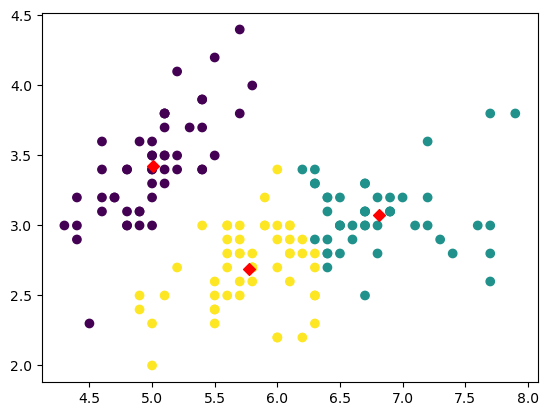

In [38]:
# model3 시각화
plt.scatter(model3_df.iloc[:,0], model3_df.iloc[:,1], c=model3_df['cluster'])
plt.scatter(model3.cluster_centers_[:,0], model3.cluster_centers_[:,1], 
            c='r', marker='D')


In [34]:
model3.inertia_

37.05070212765958

## k = 5로 군집 만들기

In [42]:
model5 = KMeans(n_clusters=5, random_state=111)
model5.fit(X)

pred5 = model5.predict(X)
pred5

array([0, 4, 4, 4, 0, 0, 4, 0, 4, 4, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 4, 4, 0, 0, 0, 4, 4, 0, 0, 0, 4, 4, 0, 0, 4, 0, 0, 4, 4, 0,
       0, 4, 0, 4, 0, 4, 3, 2, 2, 1, 2, 1, 2, 4, 2, 4, 4, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 4, 1, 1, 1, 2, 4, 1, 2, 1, 3, 2, 2, 3, 4, 3, 2, 3,
       2, 2, 2, 1, 1, 2, 2, 3, 3, 1, 2, 1, 3, 2, 2, 3, 1, 1, 2, 3, 3, 3,
       2, 2, 1, 3, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [43]:
model5_df = pd.DataFrame(X, columns=iris.feature_names[:2])
model5_df['cluster'] = pred5
model5_df

,sepal length (cm),sepal width (cm),cluster
0,5.1,3.5,0
1,4.9,3.0,4
2,4.7,3.2,4
3,4.6,3.1,4
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,1
147,6.5,3.0,2
148,6.2,3.4,2


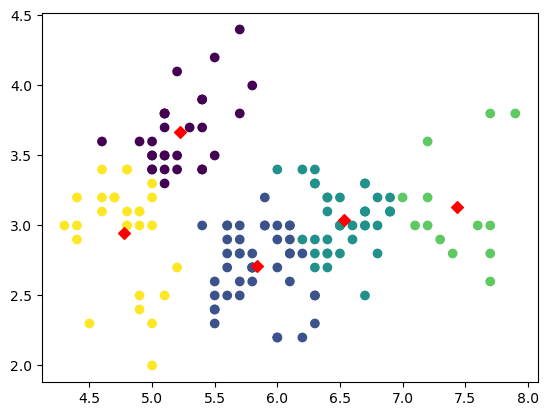

In [44]:
# model5 시각화
plt.scatter(model5_df.iloc[:,0], model5_df.iloc[:,1], c=model5_df['cluster'])
plt.scatter(model5.cluster_centers_[:,0], model5.cluster_centers_[:,1], 
            c='r', marker='D')


In [45]:
model5.inertia_

21.002125982249442

## 최적의 K 찾기: 엘보우 방식


In [46]:
k_list = range(2,11)
inertias = []

for k in k_list:
    modelk = KMeans(n_clusters=k)
    modelk.fit(X)
    inertias.append(modelk.inertia_)

In [47]:
inertias

[58.20409278906672,
 37.05070212765958,
 27.9902120383037,
 20.95735586730691,
 17.410686211664153,
 14.756476273726275,
 12.781348651348651,
 11.090186988936992,
 9.776447716513509]

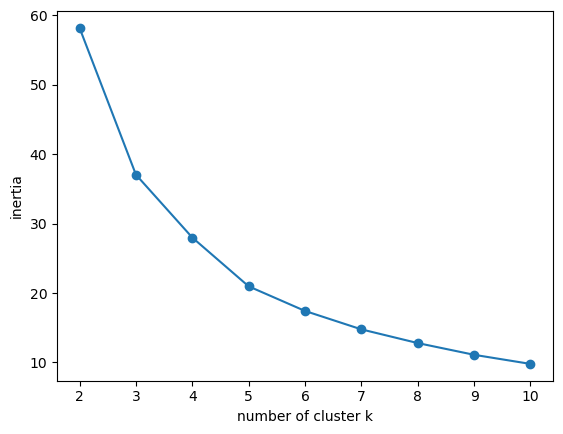

In [52]:
# 군집의 갯수 k에 따른 inertail값 변화를 시각화함
plt.plot(k_list, inertias, marker='o')
plt.xlabel('number of cluster k')
plt.ylabel('inertia')
plt.show()

## k를 3으로 군집 개수 지정

# [실습] 다음의 데이터셋을 활용하여 KMeans 군집 모델을 구축하라

* 데이터셋 : clustering_dataset.csv

In [64]:
df = pd.read_csv('/Users/kimminsoo/Desktop/ML/data/data_선형회귀/clustering_dataset.csv', usecols=[1,2])
df

,x1,x2
0,-5.673888,9.134580
1,7.783390,-7.145758
2,7.532874,-4.235851
3,-1.497504,9.437434
4,-2.912560,6.562741
...,...,...
195,-1.438523,9.690181
196,-0.252837,10.182634
197,7.415080,-4.526361
198,-1.795357,8.488310


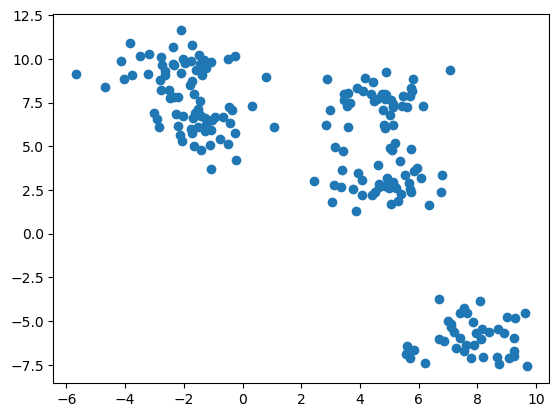

In [66]:
plt.scatter(df['x1'], df['x2'])

In [68]:
X = df[['x1', 'x2']]
k_list = range(2,11)
inertias = []

for k in k_list:
    modelk = KMeans(n_clusters=k)
    modelk.fit(X)
    inertias.append(modelk.inertia_)


In [69]:
inertias

[3030.535222131415,
 1039.9934401613357,
 614.0820194496252,
 383.0952827057124,
 348.70637523248865,
 312.15923701804337,
 282.73735947655916,
 252.60950988222203,
 235.58147489303155]

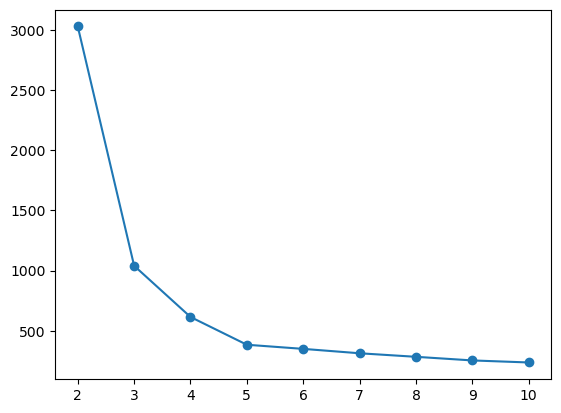

In [70]:
plt.plot(k_list, inertias, marker='o')
plt.show()

In [71]:
model3 = KMeans(n_clusters=3, random_state=111)
model3.fit(X=X)

pred3 = model3.predict(X)
pred3

array([1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 2, 0, 1, 1, 2, 2, 2, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 2, 0, 2, 0, 1, 2, 2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 1, 0, 0, 1, 2,
       1, 2, 1, 2, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0,
       1, 1, 1, 2, 0, 1, 0, 0, 0, 1, 0, 2, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0,
       0, 2, 1, 1, 0, 2, 1, 0, 1, 0, 1, 1, 2, 0, 0, 2, 0, 0, 1, 1, 2, 0,
       0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 0, 2, 1, 1,
       0, 0, 2, 1, 2, 2, 0, 0, 1, 1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 1, 1, 2,
       1, 1], dtype=int32)

In [74]:
model3_df = pd.DataFrame(X, columns=df.columns[:2])
model3_df['cluster'] = pred3
model3_df

,x1,x2,cluster
0,-5.673888,9.134580,1
1,7.783390,-7.145758,2
2,7.532874,-4.235851,2
3,-1.497504,9.437434,1
4,-2.912560,6.562741,1
...,...,...,...
195,-1.438523,9.690181,1
196,-0.252837,10.182634,1
197,7.415080,-4.526361,2
198,-1.795357,8.488310,1


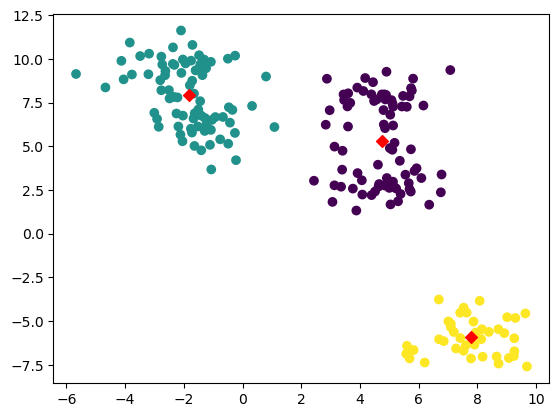

In [76]:
# model3 시각화
plt.scatter(model3_df.iloc[:,0], model3_df.iloc[:,1], c=model3_df['cluster'])
plt.scatter(model3.cluster_centers_[:,0], model3.cluster_centers_[:,1], 
            c='r', marker='D')


# 군집 평가(Cluster Evaluation) :  다음 파일로 이동